In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from keras.utils import pad_sequences
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense


2023-12-05 16:44:07.195517: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-05 16:44:07.565995: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-05 16:44:07.566049: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-05 16:44:07.619312: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-05 16:44:07.748497: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-05 16:44:07.750374: I tensorflow/core/platform/cpu_feature_guard.cc:1

## Data

In [3]:
data= pd.read_csv('data/merged.csv')
data.head(5)


text  is_fake
0  Donald Trump just couldn t wish all Americans ...        1
1  House Intelligence Committee Chairman Devin Nu...        1
2  On Friday, it was revealed that former Milwauk...        1
3  On Christmas day, Donald Trump announced that ...        1
4  Pope Francis used his annual Christmas Day mes...        1

## Preprocess

In [4]:
X= data.text
y= data.is_fake


<Axes: ylabel='Count'>

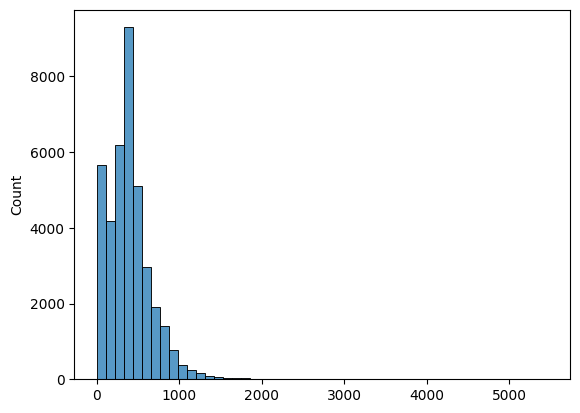

In [5]:
text_len= [len(texts.split()) for texts in data['text']]
sns.histplot(text_len, bins=50)


In [6]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.3, random_state=42)


In [7]:
X_train.head(5)


34170    Germany will wait for Israeli prosecutors to c...
32020    Two Maldivians suspected of having links to Is...
9181     This bombshell just in is more evidence of the...
35507    LONDONDERRY, Northern Ireland William Jackson ...
13614    Donald Trump won the state of Indiana in a lan...
Name: text, dtype: object

In [8]:
X_train_split= [text_to_word_sequence(t) for t in X_train]


In [9]:
X_test_split= [text_to_word_sequence(t) for t in X_test]


In [10]:
X_train_split


[['germany',
  'will',
  'wait',
  'for',
  'israeli',
  'prosecutors',
  'to',
  'conclude',
  'all',
  'investigations',
  'in',
  'a',
  'corruption',
  'scandal',
  'involving',
  'prime',
  'minister',
  'benjamin',
  'netanyahu',
  'before',
  'delivering',
  'three',
  'submarines',
  'in',
  'a',
  '2',
  'billion',
  'defense',
  'deal',
  'german',
  'magazine',
  'der',
  'spiegel',
  'reported',
  'the',
  'weekly',
  'magazine',
  'reported',
  'that',
  'the',
  'german',
  'government',
  'had',
  'signed',
  'a',
  'memorandum',
  'of',
  'understanding',
  'mou',
  'with',
  'israel',
  'under',
  'which',
  'a',
  'declaration',
  'by',
  'the',
  'israeli',
  'government',
  'would',
  'not',
  'be',
  'regarded',
  'as',
  'sufficient',
  'evidence',
  'that',
  'the',
  'affair',
  'was',
  'concluded',
  'the',
  '2016',
  'deal',
  'has',
  'been',
  'under',
  'public',
  'scrutiny',
  'since',
  'it',
  'emerged',
  'that',
  'netanyahu',
  's',
  'personal',
 

In [11]:
w2v= Word2Vec(sentences= X_train_split)
word= w2v.wv


In [12]:
#word.most_similar('germany')


In [13]:
#len(word.key_to_index)


In [14]:
word['more']


array([-3.1645837 , -0.35583782,  0.10823996, -1.4018977 ,  1.7069843 ,
        3.8413053 , -0.46486107, -4.266308  , -1.6769887 ,  4.264383  ,
       -3.068885  , -1.0396606 ,  1.0142844 , -3.0249095 , -0.43781567,
        2.140517  , -1.6903583 , -2.43043   ,  1.8933511 ,  2.9850001 ,
        1.7007877 , -1.4094211 ,  3.0373356 ,  0.38042402,  0.8571047 ,
       -2.0918078 ,  1.8833826 ,  0.49492174, -2.08684   , -1.4622017 ,
       -0.18195483,  1.5262216 ,  1.8547539 , -1.2476716 , -1.0374911 ,
        0.6435022 , -0.21248268, -0.19787085, -0.42659903,  0.9379282 ,
        2.214063  , -1.0072294 ,  0.9402276 ,  2.7568085 , -0.45678678,
       -0.31322968,  0.07842802, -1.505148  , -1.2601255 , -1.8400522 ,
        0.6483859 ,  0.92058104, -4.1369863 ,  1.9467316 ,  1.7655832 ,
       -3.6751442 ,  1.2715888 , -0.33779708, -1.8154241 , -0.1683211 ,
        2.2077827 , -1.4734081 ,  0.10687665, -0.4484206 ,  0.21626371,
        0.5738007 ,  0.6716425 , -2.3229194 , -3.0596678 , -1.21

In [ ]:
# Convert the text into a matrix of the words in the embedding space
def embed_sentence(w2v, text):
    embedded_text = []
    for words in text:
        if words in w2v.wv:
            embedded_text.append(w2v.wv[words])

    return np.array(embedded_text)

# Function that converts a list of sentences into a list of matrices
def embedding(w2v, texts):
    embed = []

    for text in texts:
        embedded_text = embed_sentence(w2v, text)
        embed.append(embedded_text)

    return embed

# Embed the training and test sentences
X_train_embed = embedding(w2v, X_train_split)
X_test_embed = embedding(w2v, X_test_split)


# Pad the training and test embedded sentences
# X_train_pad = pad_sequences(X_train_embed, maxlen=500)
# X_test_pad = pad_sequences(X_test_embed, maxlen=500)


: 

In [ ]:
#model= Sequential()

#model.add(LSTM(30))
#model.add(Dense(1, activation='sigmoid'))


In [ ]:
#def Intialized_Model(modedl):

#    model= Sequential()
